<a href="https://colab.research.google.com/github/LondheShubham153/exploratory_data_analysis/blob/main/insurance_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from numpy import where as IF
from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Data Cleaning**

- checking if age < 18
- Unique Regions
- Checking Nulls

In [6]:
age_df = df[df['age']<18]
age_df

,age,sex,bmi,children,smoker,region,charges


In [7]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
cols_to_check = df.columns
df['is_na'] = df[cols_to_check].isnull().apply(lambda x: all(x), axis=1) 
df.head() 

,age,sex,bmi,children,smoker,region,charges,is_na
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,False
2,28,male,33.000,3,no,southeast,4449.46200,False
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


**Creating Age Groups**

In [9]:
df["age_grp"] = IF(df.age < 18, "Children",
                        IF(df.age < 30, "Youth",
                         IF(df.age < 60, "Adult",
                          IF(df.age < 100, "Senior", "NaN"
                          )
                         )
                        )
                       )

In [10]:
df

,age,sex,bmi,children,smoker,region,charges,is_na,age_grp
0,19,female,27.900,0,yes,southwest,16884.92400,False,Youth
1,18,male,33.770,1,no,southeast,1725.55230,False,Youth
2,28,male,33.000,3,no,southeast,4449.46200,False,Youth
3,33,male,22.705,0,no,northwest,21984.47061,False,Adult
4,32,male,28.880,0,no,northwest,3866.85520,False,Adult
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,False,Adult
1334,18,female,31.920,0,no,northeast,2205.98080,False,Youth
1335,18,female,36.850,0,no,southeast,1629.83350,False,Youth
1336,21,female,25.800,0,no,southwest,2007.94500,False,Youth


In [11]:
comb_df = df.groupby(by = ["sex","region"])["charges"].sum().reset_index()
comb_df.head()


,sex,region,charges
0,female,northeast,2.085466e+06
1,female,northwest,2.046699e+06
2,female,southeast,2.362442e+06
3,female,southwest,1.826455e+06
4,male,northeast,2.258203e+06


In [18]:
res = comb_df.pivot(index = "region", columns = "sex", values = "charges")
res

sex,female,male
region,,
northeast,2.085466e+06,2.258203e+06
northwest,2.046699e+06,1.989013e+06
southeast,2.362442e+06,3.001248e+06
southwest,1.826455e+06,2.186300e+06


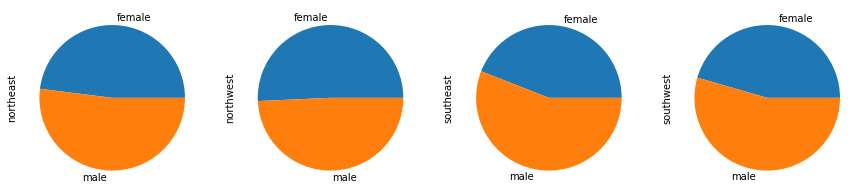

In [19]:
res.T.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))
plt.show()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


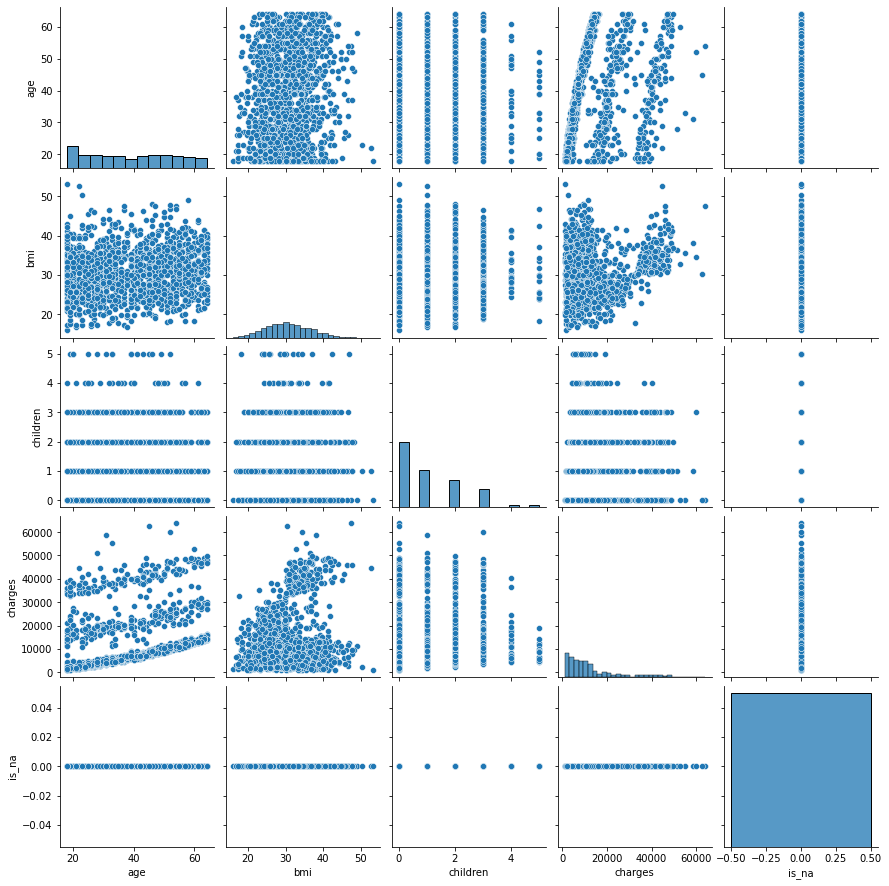

In [13]:
sns.pairplot(df)

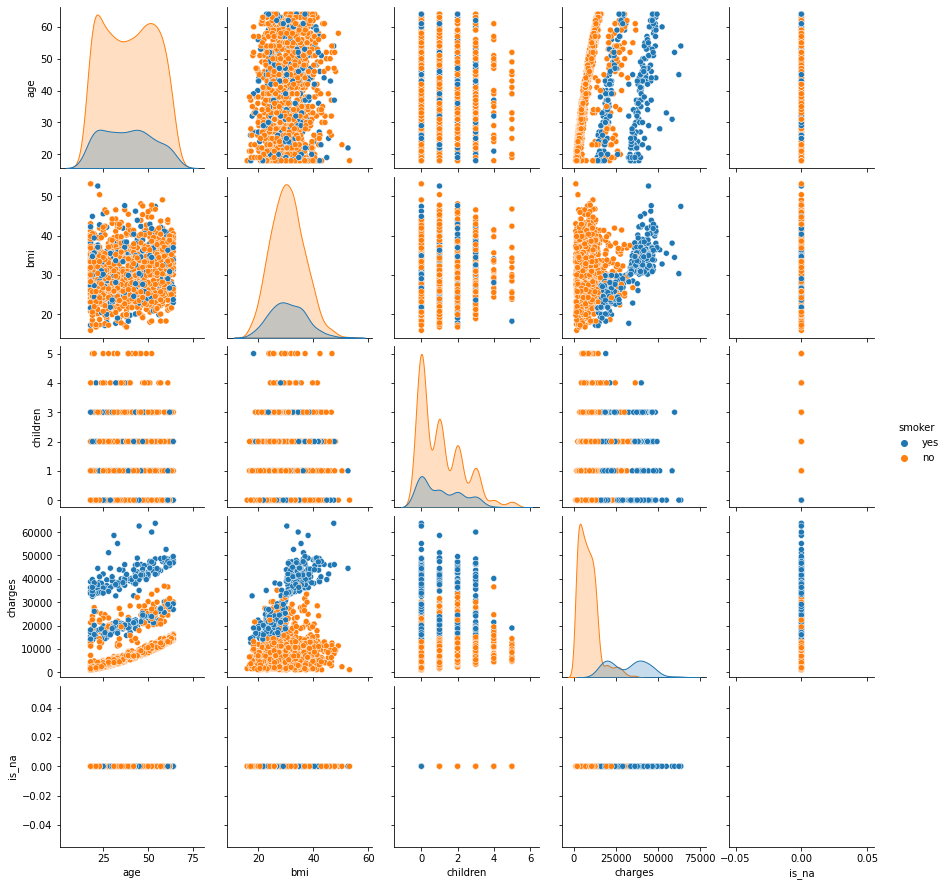

In [14]:
sns.pairplot(df, hue="smoker")


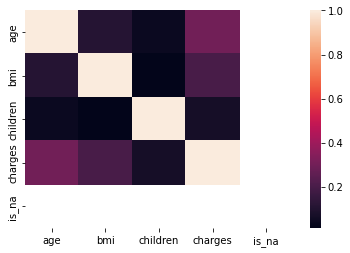

In [17]:
sns.heatmap(df.corr())

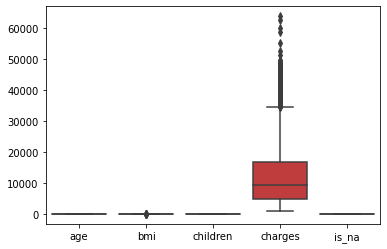

In [15]:
sns.boxplot(data=df)


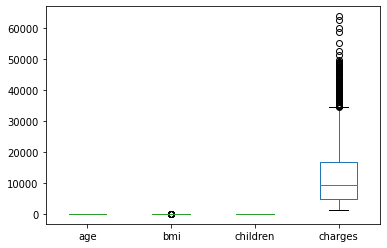

In [16]:
df.plot(kind='box')
plt.show()

In [ ]:
sns